In [2]:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
import numpy as np # linear algebra
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

print('Done')

Done


# Introductory Materials



In [3]:
DATA = pd.read_csv("input/data.csv")
DATA.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data quick preparation


In [4]:
# Ids = DATA.Id
# DATA.drop('Id', axis = 'columns', inplace=True)
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



# Exploring the Data, planning the preprocessing


## Features Overview


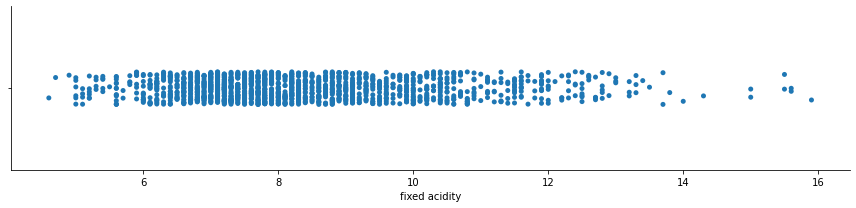

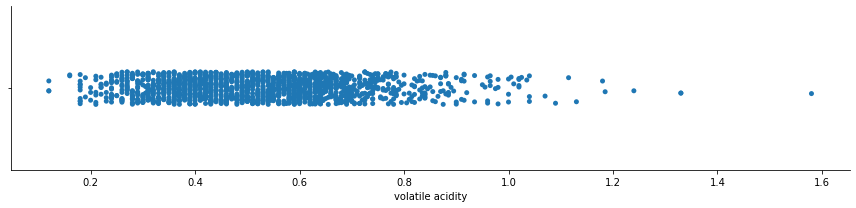

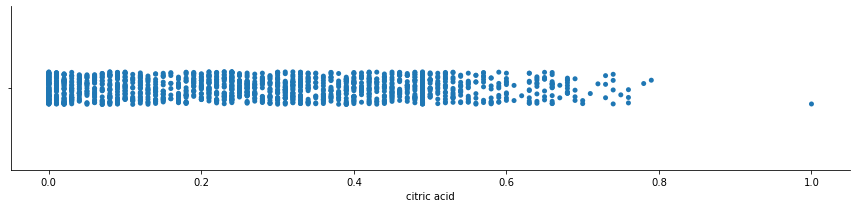

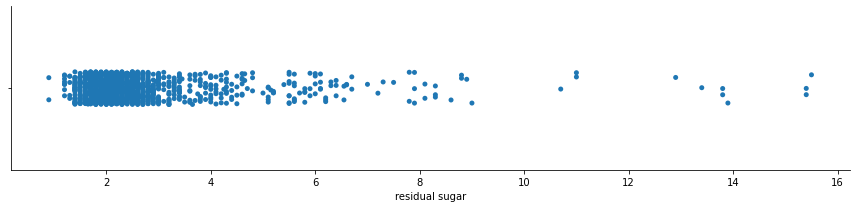

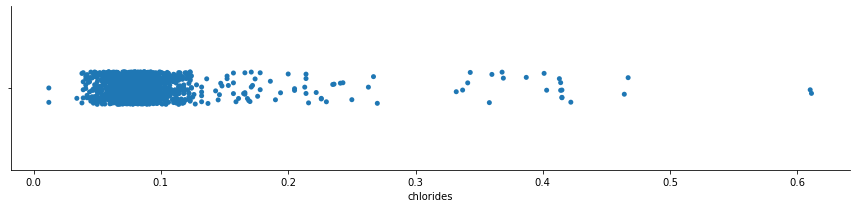

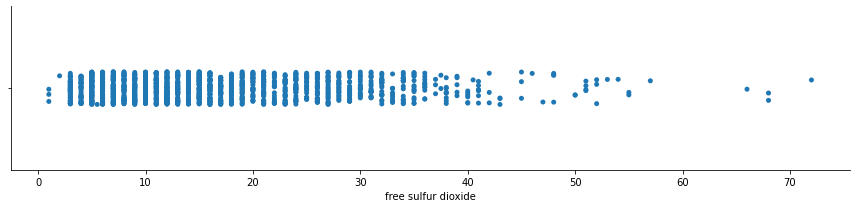

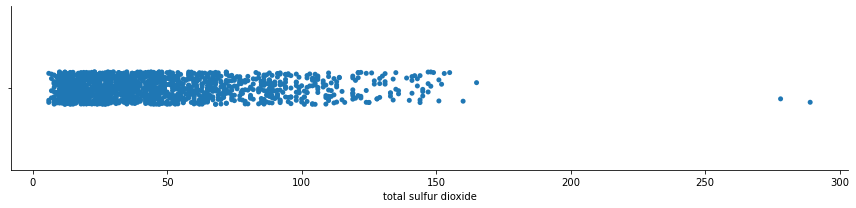

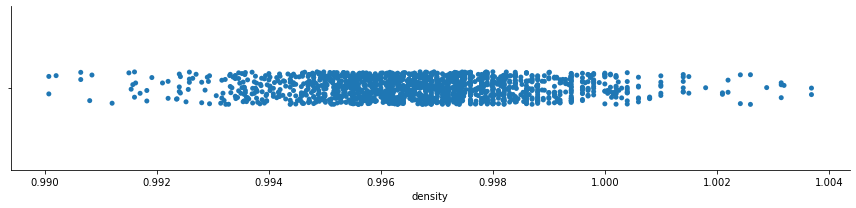

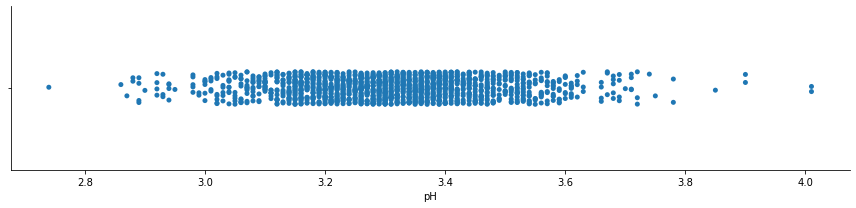

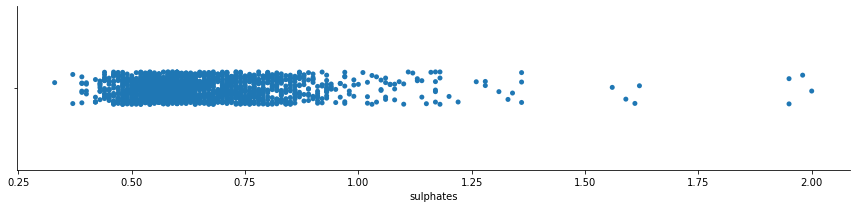

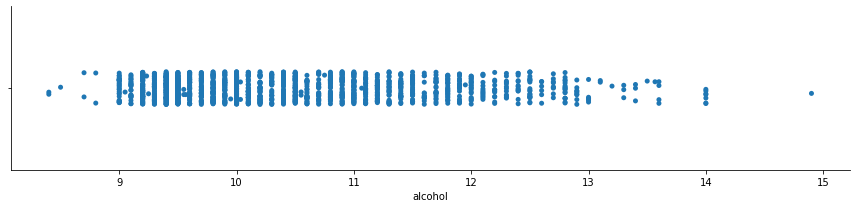

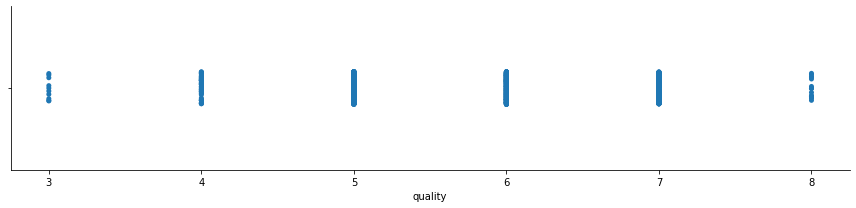

In [5]:
from libs.simpleplotter import simple_features_overview
simple_features_overview(DATA)

# Correlations between data

In [6]:
# Heatmap
from libs.simpleplotter import simple_heatmap
# simple_heatmap(DATA)

##

In [7]:
# sns.catplot(x="SepalLengthCm",y="Species",data=DATA)
from libs.simpleplotter import simple_correlations
# simple_correlations(DATA, "quality")


## Missing, Categorical & Not Useful Data


In [8]:
# DATA.describe(include='object')

In [9]:
DATA.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
DATA.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



# Data Processing


In [11]:
# Let's run the preprocessing on both train and test data

PROCESSED = DATA.copy(deep=True)


# PROCESSED["Na"] = PROCESSED["Na"]/10
# PROCESSED["Si"] = PROCESSED["Si"]/30
# PROCESSED["Mg"] = PROCESSED["Mg"]/4
# PROCESSED["Ca"] = PROCESSED["Ca"]/8
# PROCESSED["RI"] = PROCESSED["RI"]/1.5

print("Done")
# df['Age'].fillna(df["Age"].mean(), inplace=True)
# fill missing embarked values with the most common one
# df['Embarked'].fillna('S', inplace=True)
# we don't need whole age, as experiments show that age < 18
# is most important for survival
# df["is_child"] = df["Age"]<18

# cols = ['Name', 'Cabin', 'Ticket', 'PassengerId']
# df.drop(cols, axis=1, inplace=True)
# for the need of Receiver Operating Characteristic (ROC) diagram we need to convert strings to ints
# PROCESSED.replace('Iris-setosa', 1, inplace=True)
# PROCESSED.replace('Iris-versicolor', 2, inplace=True)
# PROCESSED.replace('Iris-virginica', 3, inplace=True)

Done


In [12]:
PROCESSED.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



# Post-Processing Data Analysis


In [13]:
# Heatmap
from libs.simpleplotter import simple_heatmap
# simple_heatmap(PROCESSED)

# Preparing for Model Training

## Separating target from features

In [14]:
target = 'quality'
y = PROCESSED[target]
X = PROCESSED.drop([target], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


## Splitting train data into train & validation data
as we can see the number of records in train data is lowered

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 642 to 684
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


In [16]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 1109 to 1023
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         320 non-null    float64
 1   volatile acidity      320 non-null    float64
 2   citric acid           320 non-null    float64
 3   residual sugar        320 non-null    float64
 4   chlorides             320 non-null    float64
 5   free sulfur dioxide   320 non-null    float64
 6   total sulfur dioxide  320 non-null    float64
 7   density               320 non-null    float64
 8   pH                    320 non-null    float64
 9   sulphates             320 non-null    float64
 10  alcohol               320 non-null    float64
dtypes: float64(11)
memory usage: 30.0 KB


# Models Training & Hyper-params Tuning for Different Classification Models


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from libs.simple_processing import get_model_name, print_scores
#
params = [
#     # {
#     #     'model': KNeighborsClassifier(),
#     #     'hyperparams': {
#     #         'n_neighbors': range(16, 20, 1),
#     #         'n_jobs': range(4, 5, 1)
#     #     }
#     # },
#     # {
#     #     'model': DecisionTreeClassifier(random_state=0),
#     #     'hyperparams': {
#     #         'max_depth': [1, 2, 3, 4, 5],
#     #         'max_leaf_nodes': range(2, 7, 1)
#     #     }
#     # },
#
#     # 0.8011627906976744
#     # {'max_depth': 10, 'n_estimators': 90}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=False),
#     #     'hyperparams': {
#     #         'n_estimators': range(20, 100, 10),
#     #         'max_depth': range(4, 10, 1)
#     #     }
#     # }
#     # 0.8069767441860465
#     # {'max_depth': 8, 'n_estimators': 120, 'random_state': 10}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
#     #     'hyperparams': {
#     #         'random_state': range(0, 60, 10),
#     #         'n_estimators': range(80, 150, 10),
#     #         'max_depth': range(7, 15, 1)
#     #     }
#     # }
#     # 0.8012311901504787
#     # {'ccp_alpha': 0.0, 'max_depth': 7, 'max_samples': 50, 'n_estimators': 110, 'random_state': 0}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
#     #     'hyperparams': {
#     #         'ccp_alpha': np.arange(0, 1, 0.2),
#     #         'max_samples': range(10, 80, 10),
#     #         'random_state': range(0, 30, 5),
#     #         'n_estimators': range(100, 140, 10),
#     #         'max_depth': range(7, 10, 1)
#     #     }
#     # }
#     # 0.8012995896032832
#     # {'max_depth': 6, 'max_samples': 65, 'n_estimators': 100, 'random_state': 0}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
#     #     'hyperparams': {
#     #         'max_samples': range(40, 70, 5),
#     #         'random_state': range(0, 30, 5),
#     #         'n_estimators': range(100, 130, 10),
#     #         'max_depth': range(5, 9, 1)
#     #     }
#     # }
#     # 0.8012995896032832
#     # {'max_depth': 6, 'max_samples': 65, 'n_estimators': 60}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True, random_state=0),
#     #     'hyperparams': {
#     #         'max_samples': range(50, 80, 5),
#     #         'n_estimators': range(40, 80, 10),
#     #         'max_depth': range(5, 9, 1)
#     #     }
#     # }
#     # 0.8012995896032832
#     # {'max_depth': 6, 'max_features': 'auto', 'max_samples': 65, 'n_estimators': 60}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, bootstrap=True, oob_score=True, random_state=0),
#     #     'hyperparams': {
#     #         'max_features':["auto", "sqrt", "log2"],
#     #         'max_samples': range(50, 80, 5),
#     #         'n_estimators': range(40, 80, 10),
#     #         'max_depth': range(4, 8, 1)
#     #     }
#     # }
#     # 0.7370041039671682
#     # {'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 11, 'random_state': 5}
#     # {
#     #     'model': GradientBoostingClassifier(max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         'random_state': range(0, 30, 5),
#     #         'n_estimators': range(5, 15, 1),
#     #         'learning_rate': np.arange(0.01, 0.1, 0.01),
#     #         'max_depth': range(4, 8, 1)
#     #     }
#     # }
#     # 0.7954856361149111
#     # {'learning_rate': 1.0199999999999996, 'max_depth': 5, 'n_estimators': 12, 'random_state': 10}
#     # {
#     #     'model': GradientBoostingClassifier(max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         'random_state': range(0, 15, 5),
#     #         'n_estimators': range(10, 13, 1),
#     #         'learning_rate': np.arange(0.07, 1.2, 0.01),
#     #         'max_depth': range(5, 8, 1)
#     #     }
#     # }
#     # 0.8185362517099863
#     # {'learning_rate': 1.2, 'max_depth': 6, 'n_estimators': 80, 'random_state': 6}
#     # {
#     #     'model': GradientBoostingClassifier(max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         'random_state': range(0, 10, 2),
#     #         'n_estimators': range(20, 100, 10),
#     #         'learning_rate': np.arange(0.9, 1.5, 0.1),
#     #         'max_depth': range(4, 12, 2)
#     #     }
#     # }
#     # 0.8245554035567715
#     # {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}
#     {
#         'model': GradientBoostingClassifier(loss='deviance', max_features="auto"),
#         'hyperparams': {
#             'criterion': ['friedman_mse', 'mse', 'mae'],
#             # 'loss':['deviance', 'exponential'],
#             'random_state': range(5, 8, 1),
#             'n_estimators': range(60, 90, 5),
#             'learning_rate': np.arange(1, 1.4, 0.1),
#             'max_depth': range(4, 9, 1)
#         }
#     }
#     # {'learning_rate': 1.2000000000000002, 'max_depth': 7, 'n_estimators': 81, 'random_state': 5}
#     # {
#     #     'model': GradientBoostingClassifier(criterion='mse', loss='deviance', max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         # 'loss':['deviance', 'exponential'],
#     #         'random_state': range(0, 10, 2),
#     #         'n_estimators': range(80, 85, 1),
#     #         'learning_rate': np.arange(1, 1.4, 0.1),
#     #         'max_depth': range(6, 11, 1)
#     #     }
#     # }
#     # cv=3
#     # train / test: 50 / 50
#     {
#         'model': GradientBoostingClassifier(criterion='mse', loss='deviance', max_features="auto"),
#         'hyperparams': {
#             'random_state': range(0, 10, 2),
#             'n_estimators': range(80, 83, 1),
#             'learning_rate': np.arange(1, 1.4, 0.1),
#             'max_depth': range(6, 9, 1)
#         }
#     }
# > Model: GradientBoostingClassifier cv:  5
# 0.6349019607843138
# {'random_state': 25}
    {
        'cv': [5],
        'model': GradientBoostingClassifier(loss='deviance', criterion='squared_error', n_estimators=75, learning_rate=1.2, max_depth=6, max_features='log2', random_state=25),
        'hyperparams': {
            'random_state': np.arange(22, 27, 1)
        }
    }
]
#
# # https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
#
grid_model = {}

for p in params:
    for cv in p['cv']:
        print('> Model:', get_model_name(p['model']), 'cv: ', cv)
        grid_model = GridSearchCV(p['model'], p['hyperparams'], cv=cv, n_jobs=3, verbose=0)
        grid_model.fit(X_train, y_train)
        # y_pred = grid_model.predict(X_valid)
        print(grid_model.best_score_)
        print(grid_model.best_params_)
        print()


print('Done.')

> Model: GradientBoostingClassifier cv:  5
0.6349019607843138
{'random_state': 25}

Done.


In [17]:
# model = {}
#
# # model = GradientBoostingClassifier(criterion='mse', learning_rate=1.2, max_depth=6, n_estimators=75)
#
# for lr in np.arange(0.8, 1.4, 0.1):
#     for md in range(4, 12, 1):
#         for ne in range(70, 120, 5):
#             model = GradientBoostingClassifier(criterion='mse', learning_rate=1.2, max_depth=md, n_estimators=ne)
#             model.fit(X_train, y_train)
#             print('lr: {:.2f}'.format(lr) + ' md: {:.0f}'.format(md) + ' ne: {:.0f}'.format(ne)
#                   + ' => train data score: {:.3f}'.format(model.score(X_train, y_train))
#                 + ' val data score: {:.3f}'.format(model.score(X_valid, y_valid)))


In [18]:
# from libs.single_scoring import get_scoring
# parameters = [
# #     params:  {'n_estimators': 450, 'learning_rate': 0.035, 'max_depth': 6}
# # => train data: 0.973 val data: 0.716
# #     {
# #         'modelName': globals()["GradientBoostingClassifier"],
# #         'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
# #         'rvalues': [range(150, 500, 100), np.arange(0.02, 0.04, 0.005), range(4, 7, 1)],
# #         'pnames': [],
# #         'pvalues': []
# #     }
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'rvalues': [range(350, 1000, 100), np.arange(0.03, 0.08, 0.01), range(5, 9, 1)],
#         'pnames': [],
#         'pvalues': []
#     }
#     # {
#     #     'modelName': GradientBoostingClassifier(),
#     #     'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
#     #     'rvalues': [range(350, 1000, 100), np.arange(0.03, 0.08, 0.01), range(5, 9, 1)],
#     #     'pnames': ['criterion'],
#     #     'pvalues': ["mse"]
#     # }
# ]
#
# for p in parameters:
#     score = get_scoring(X_train, y_train, X_valid, y_valid, p['modelName'], p['rnames'], p['rvalues'], p['pnames'], p['pvalues'])
#
#
print("Done")


Done


In [19]:
from libs.single_scoring import get_scoring
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
parameters = [
    #     params:  {'n_estimators': 450, 'learning_rate': 0.035, 'max_depth': 6}
    # => train data: 0.973 val data: 0.716
    #     {
    #         'modelName': globals()["GradientBoostingClassifier"],
    #         'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
    #         'rvalues': [range(150, 500, 100), np.arange(0.02, 0.04, 0.005), range(4, 7, 1)],
    #         'pnames': [],
    #         'pvalues': []
    #     }
    # {
    #     'n_estimators': range(200, 600, 100),
    #     'learning_rate': np.arange(0.03, 0.07, 0.01),
    #     'max_depth': range(5, 9, 1)
    # },
#     BEST params:  {'n_estimators': 90, 'learning_rate': 0.04, 'max_depth': 8}
# => train data: 1.000 val data: 0.731
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(10, 100, 10), np.arange(0.03, 0.07, 0.01), range(5, 9, 1)],
#         'params': {}
#     }
#     BEST params:  {'n_estimators': 200, 'learning_rate': 0.02, 'max_depth': 7}
# => train data: 1.000 val data: 0.713
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(50, 300, 50), np.arange(0.01, 0.04, 0.01), range(5, 8, 1)],
#         'params': {'criterion': "mse", "n_jobs": 3}
#     }
#     BEST params:  {'n_estimators': 90, 'learning_rate': 1.0, 'max_depth': 7}
# => train data: 1.000 val data: 0.713
# {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(60, 120, 10), np.arange(1, 1.4, 0.1), range(5, 8, 1)],
#         'params': {'max_features': "auto", "n_jobs": 3, 'criterion': 'mse'}
#     }
#     BEST params:  {'n_estimators': 90, 'learning_rate': 0.6, 'max_depth': 9}
# => train data: 1.000 val data: 0.750
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(60, 120, 10), np.arange(0.5, 1, 0.1), range(6, 10, 1)],
#         'params': {'max_features': "auto", "n_jobs": 3, 'criterion': 'mse'}
#     }
#     BEST params:  {'n_estimators': 90, 'learning_rate': 0.7, 'max_depth': 11}
# => train data: 1.000 val data: 0.756
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(80, 110, 10), np.arange(0.5, 0.8, 0.1), range(8, 12, 1)],
#         'params': {'max_features': "auto", "n_jobs": 3, 'criterion': 'mse'}
#     }
#     BEST params:  {'n_estimators': 100, 'learning_rate': 0.7, 'max_depth': 11}
# => train data: 1.000 val data: 0.753
#     BEST params:  {'n_estimators': 130, 'learning_rate': 0.8999999999999999, 'max_depth': 11}
# => train data: 1.000 val data: 0.738
#     model = RandomForestClassifier(criterion='gini', max_depth=7, n_estimators=150, n_jobs=4, random_state=0)

#     RandomForestClassifier
#     BEST params:  {'n_estimators': 80, 'bootstrap': False, 'max_depth': 10}
# => train data: 0.973 val data: 0.734
#     {
#         'modelName': globals()["RandomForestClassifier"],
#         'hyperParamNames': ['n_estimators', 'bootstrap', 'max_depth'],
#         'hyperParamValues': [range(80, 140, 10), [True, False], range(7, 11, 1)],
#         'params': {'random_state': 0, "n_jobs": 3, 'criterion': 'gini'}
#     }
#     BEST params:  {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 15}
# => train data: 1.000 val data: 0.747
#     BEST params:  {'n_estimators': 50, 'max_leaf_nodes': 26, 'max_depth': 12}
# => train data: 0.720 val data: 0.694
#     {
#         'modelName': globals()["RandomForestClassifier"],
#         'hyperParamNames': ['n_estimators', 'max_leaf_nodes', 'max_depth'],
#         'hyperParamValues': [range(50, 100, 10), range(2, 30, 2), range(10, 30, 2)],
#         'params': {"n_jobs": 3, 'bootstrap': True, 'criterion': 'gini', 'random_state': 0}
#     }
#     BEST params:  {'n_estimators': 30, 'max_leaf_nodes': 18, 'max_depth': 8}
# => train data: 0.695 val data: 0.681
#     {
#         'modelName': globals()["RandomForestClassifier"],
#         'hyperParamNames': ['n_estimators', 'max_leaf_nodes', 'max_depth'],
#         'hyperParamValues': [range(20, 70, 10), range(2, 30, 2), range(4, 10, 2)],
#         'params': {"n_jobs": 3, 'bootstrap': True, 'criterion': 'gini', 'random_state': 0}
#     }
#     BEST params:  {'n_estimators': 41, 'max_leaf_nodes': 19, 'max_depth': 8}
# => train data: 0.672 val data: 0.684
#     {
#         'modelName': globals()["RandomForestClassifier"],
#         'hyperParamNames': ['n_estimators', 'max_leaf_nodes', 'max_depth'],
#         'hyperParamValues': [range(39, 43, 1), range(12, 20, 1), range(7, 10, 1)],
#         'params': {"n_jobs": 3, 'bootstrap': True, 'criterion': 'gini', 'random_state': 0}
#     }
#     BEST params:  {'n_estimators': 120, 'bootstrap': False, 'max_depth': 10}
# => train data: 0.974 val data: 0.741
#     {
#         'modelName': globals()["RandomForestClassifier"],
#         'hyperParamNames': ['n_estimators', 'bootstrap', 'max_depth'],
#         'hyperParamValues': [range(80, 140, 10), [True, False], range(7, 11, 1)],
#         'params': {'random_state': 0, "n_jobs": 3, 'criterion': 'gini'}
#     }
#     BEST params:  {'n_estimators': 110, 'bootstrap': False, 'max_depth': 9}
# => train data: 0.934 val data: 0.731
#     {
#         'modelName': globals()["RandomForestClassifier"],
#         'hyperParamNames': ['n_estimators', 'bootstrap', 'max_depth'],
#         'hyperParamValues': [range(80, 140, 10), [True, False], range(7, 10, 1)],
#         'params': {'random_state': 0, "n_jobs": 3, 'criterion': 'gini', 'max_leaf_nodes': 19}
#     }
#     BEST params:  {'C': 0.8, 'penalty': 'l2', 'solver': 'liblinear'}
# => train data: 0.574 val data: 0.628
#     {
#         'modelName': globals()["LogisticRegression"],
#         'hyperParamNames': ['C', 'penalty', 'solver'],
#         'hyperParamValues': [np.arange(0.6, 1.4, 0.2), ['l2'], ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']],
#         'params': {'random_state': 8, "n_jobs": 3}
#     }
    {
        'modelName': globals()["LogisticRegression"],
        'hyperParamNames': ['solver', 'penalty', 'max_iter'],
        'hyperParamValues': [['saga'], ['l1', 'elasticnet'], range(60, 140, 10)],
        'params': {'random_state': '8', "n_jobs": 3, 'C': '0.8', "l1_ratio": "0.5"}
    }
]

for p in parameters:
    score = get_scoring(X_train, y_train, X_valid, y_valid, p['modelName'], p['hyperParamNames'], p['hyperParamValues'])


print("Done")


Fits to be done:  16
1.. 
params:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 60}
LogisticRegression => train data: 0.498 val data: 0.528
2.. 3.. 

/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


4.. 

/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



params:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 90}
LogisticRegression => train data: 0.501 val data: 0.534
5.. 
params:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100}
LogisticRegression => train data: 0.502 val data: 0.537
6.. 

/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


7.. 8.. 

/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



params:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 130}
LogisticRegression => train data: 0.507 val data: 0.541
9.. 

ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

## Score


In [ ]:
# FROM GRIDSEARCHCV

    # 0.8245554035567715
#     # {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}
# {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}

#     BEST params:  {'n_estimators': 90, 'learning_rate': 0.7, 'max_depth': 11}
# => train data: 1.000 val data: 0.756
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(80, 110, 10), np.arange(0.5, 0.8, 0.1), range(8, 12, 1)],
#         'params': {'max_features': "auto", "n_jobs": 3, 'criterion': 'mse'}
#     }
model = GradientBoostingClassifier(max_features="auto", criterion='mse', learning_rate=0.7, max_depth=11, n_estimators=90, random_state=6)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

In [ ]:
# BEST params:  {'n_estimators': 110, 'bootstrap': False, 'max_depth': 9}
# => train data: 0.934 val data: 0.731
# {
#     'modelName': globals()["RandomForestClassifier"],
#     'hyperParamNames': ['n_estimators', 'bootstrap', 'max_depth'],
#     'hyperParamValues': [range(80, 140, 10), [True, False], range(7, 10, 1)],
#     'params': {'random_state': 0, "n_jobs": 3, 'criterion': 'gini', 'max_leaf_nodes': 19}
# }
model = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=110, n_jobs=3, random_state=0, max_leaf_nodes=19)
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

In [ ]:
from libs.simple_processing import print_scores

model = KNeighborsClassifier(n_jobs=4, n_neighbors=19)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

In [ ]:
from libs.simpleplotter import decision_tree
model = DecisionTreeClassifier(max_depth=9, random_state=0, max_leaf_nodes=9 )
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))
# decision_tree(model, X_train)

In [ ]:
# BEST params:  {'n_estimators': 130, 'learning_rate': 0.8999999999999999, 'max_depth': 11}
# => train data: 1.000 val data: 0.738
model = GradientBoostingClassifier(max_features="auto", learning_rate=1.2, max_depth=6, n_estimators=80)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))


# Winner

In [ ]:
model = GradientBoostingClassifier(max_features="auto", criterion='mse', learning_rate=0.7, max_depth=11, n_estimators=90, random_state=6)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))


## Receiver Operating Characteristic (ROC)

In [ ]:
from pandas import DataFrame
from libs.simpleplotter import simple_roc
y_pred = model.predict(X_valid)

df = DataFrame(y_valid, y_pred)
df
# simple_roc(y_valid, y_pred)

## Confusion Matrix / Macierz pomyłek

In [ ]:
from libs.simpleplotter import simple_confusion_matrix
conf_matrix = simple_confusion_matrix(y_valid, y_pred, model.classes_)

## Which features became decision makers for the model?

In [ ]:
from libs.simpleplotter import feature_importance

feature_importance(model, X_train)

# Generating Model Predictions For Test Data & Saving the results for Kaggle Competition

In [ ]:
y_pred = model.predict(X)
output = pd.DataFrame({'Id': Ids, 'Species': y_pred})

print_scores(y, y_pred)
# output.to_csv('./submission.csv', index=False)
# SUBMISSION = pd.read_csv("./submission.csv")
# SUBMISSION